In [13]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import tushare as ts
from datetime import datetime
import pytrendseries
import os

TOKEN_PATH = os.path.expanduser("~/.tushare.token")
with open(TOKEN_PATH, "r+") as f:
    token = f.read().strip()
    ts.set_token(token=token)
    pro = ts.pro_api(token)

df = pro.daily(ts_code="000001.SZ", start_date="20220901", end_date="20240129") \
        .sort_values(by="trade_date", ascending=True)
        
df.rename(columns={"trade_date": "date"}, inplace=True)
df.index = pd.to_datetime(df.date)
df

,ts_code,date,open,high,low,...,pre_close,change,pct_chg,vol,amount
date,,,,,,,,,,,
2022-09-01,000001.SZ,20220901,12.65000,12.79000,12.58000,...,12.75000,-0.14000,-1.09800,861981.95000,1092666.27700
2022-09-02,000001.SZ,20220902,12.62000,12.69000,12.43000,...,12.61000,-0.10000,-0.79300,786362.81000,983433.86300
2022-09-05,000001.SZ,20220905,12.46000,12.60000,12.37000,...,12.51000,0.06000,0.47960,632039.98000,788451.08900
2022-09-06,000001.SZ,20220906,12.58000,12.66000,12.43000,...,12.57000,-0.07000,-0.55690,731294.99000,914692.18400
2022-09-07,000001.SZ,20220907,12.42000,12.42000,12.28000,...,12.50000,-0.17000,-1.36000,979812.81000,1208329.75900
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-23,000001.SZ,20240123,9.05000,9.18000,8.96000,...,9.10000,0.06000,0.65930,1135544.58000,1030898.42100
2024-01-24,000001.SZ,20240124,9.23000,9.34000,9.07000,...,9.16000,0.17000,1.85590,1759123.16000,1620099.27200
2024-01-25,000001.SZ,20240125,9.33000,9.54000,9.27000,...,9.33000,0.17000,1.82210,2162513.95000,2037648.41300


Trends detected in 0.02 secs


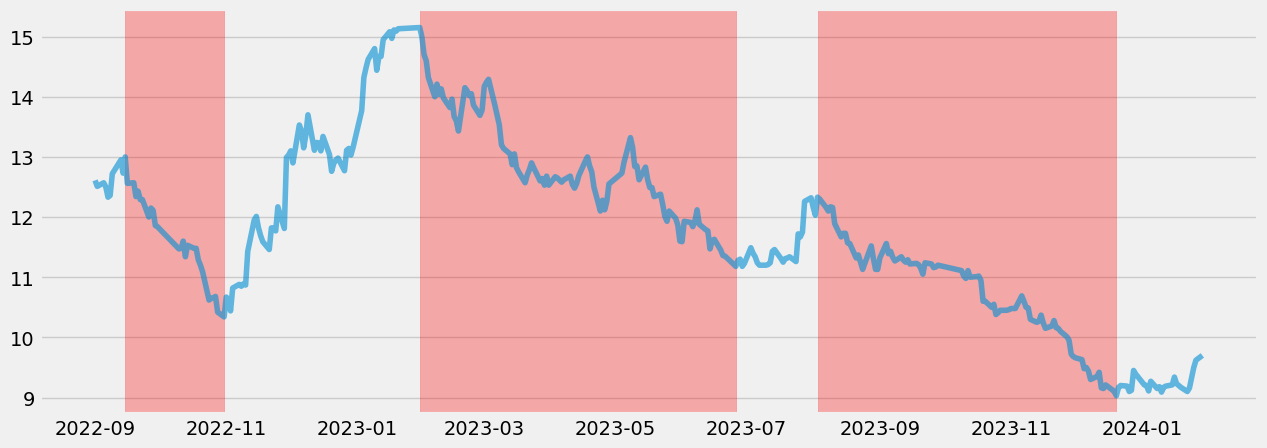

Plotted in 0.15 secs


In [14]:

# 下跌趋势
downtrends_detected = pytrendseries.detecttrend(
    df[["close"]], 
    trend="downtrend", 
    limit=14,  # 最小被考虑为趋势的天数目
    window=100 # 最大被考虑为趋势的天数目
)
pytrendseries.vizplot.plot_trend(
    df[["close"]], 
    downtrends_detected, 
    "downtrend"
)


Trends detected in 0.02 secs


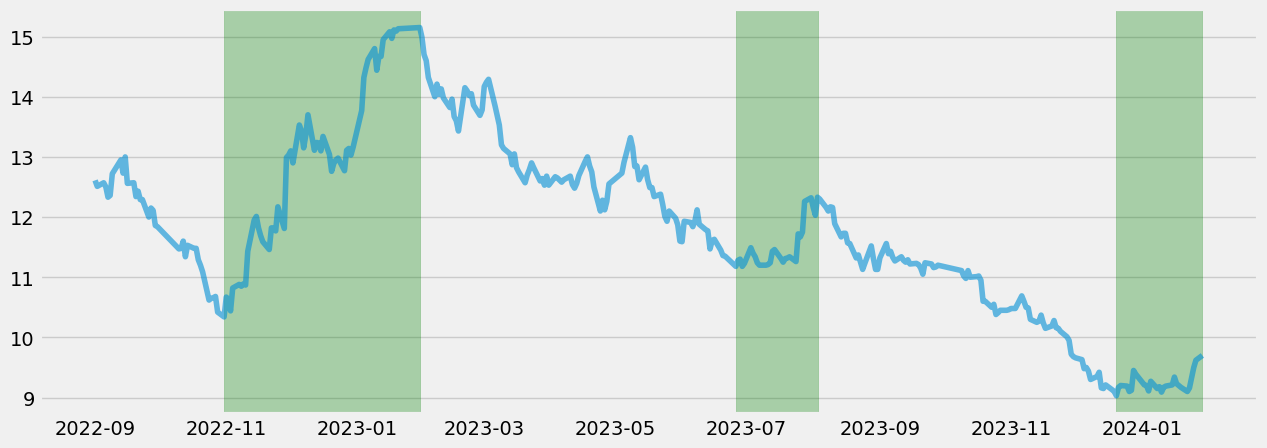

Plotted in 0.16 secs


In [15]:

# 上涨趋势
uptrends_detected = pytrendseries.detecttrend(
    df[["close"]], 
    trend="uptrend", 
    limit=14,
    window=180
)

pytrendseries.vizplot.plot_trend(
    df[["close"]], 
    uptrends_detected, 
    "uptrend"
)